Source:  
https://archive.ics.uci.edu/dataset/571/hcv+data

Features:  
ID Patient (Index)  

Category (Target)  : 0=Blood Donor  |  0s=suspect Blood Donor  | 1=Hepatitis  | 2=Fibrosis  | 3=Cirrhosis  

Age  

Sex  

ALB - Albumin: Albumin is a protein produced by the liver. Its levels in the blood can indicate liver function and overall health. Abnormal levels may suggest liver disease or other conditions.  

ALP - Alkaline Phosphatase: Alkaline phosphatase is an enzyme found in various tissues throughout the body, including the liver, bones, and bile ducts. Elevated levels may indicate liver or bone disorders.  

AST - Aspartate Aminotransferase: AST is an enzyme found in the liver, heart, muscles, and other tissues. Elevated levels may suggest liver damage or heart muscle injury.  

BIL - Bilirubin: Bilirubin is a yellowish pigment produced during the breakdown of red blood cells. Elevated levels may indicate liver disease or certain blood disorders.  

CHE - Cholinesterase: Cholinesterase is an enzyme primarily produced by the liver. Its levels can indicate liver function and may be affected by certain medications or liver diseases.  

CHOL - Cholesterol: Cholesterol is a fatty substance found in the blood. High levels of cholesterol can increase the risk of heart disease and other cardiovascular problems.  

CREA - Creatinine: Creatinine is a waste product generated by muscle metabolism. Its levels in the blood can indicate kidney function. Abnormal levels may suggest kidney disease or other conditions affecting kidney function.  

GGT - A gamma-glutamyl transferase test measures the amount of GGT in the blood. GGT is an enzyme found throughout the body, but it is mostly found in the liver. When the liver is damaged, GGT may leak into the bloodstream. High levels of GGT in the blood may be a sign of liver disease or damage to the bile ducts. Bile ducts are tubes that carry bile in and out of the liver. Bile is a fluid made by the liver. It is important for digestion.  

PROT - (Protein) refers to the total protein concentration measured in the blood of the patients. It is an important clinical marker used to assess the health and function of various organs, especially the liver, and to diagnose a range of medical conditions.  

## Loading the dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv(filepath_or_buffer="hcvdat0.csv", index_col=[0])
data.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


## Data Description

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 615 entries, 1 to 615
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 67.3+ KB


In [4]:
data.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [5]:
data.shape

(615, 13)

In [6]:
data.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [7]:
data.Category.unique()

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

In [8]:
# Find unique values for each column
len_unique = {}
for col in data.columns:
    len_unique[col]=len(data[col].unique())
len_unique

{'Category': 5,
 'Age': 49,
 'Sex': 2,
 'ALB': 190,
 'ALP': 415,
 'ALT': 342,
 'AST': 297,
 'BIL': 188,
 'CHE': 407,
 'CHOL': 314,
 'CREA': 117,
 'GGT': 358,
 'PROT': 199}

array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'ALB'}>,
        <Axes: title={'center': 'ALP'}>],
       [<Axes: title={'center': 'ALT'}>, <Axes: title={'center': 'AST'}>,
        <Axes: title={'center': 'BIL'}>],
       [<Axes: title={'center': 'CHE'}>,
        <Axes: title={'center': 'CHOL'}>,
        <Axes: title={'center': 'CREA'}>],
       [<Axes: title={'center': 'GGT'}>,
        <Axes: title={'center': 'PROT'}>, <Axes: >]], dtype=object)

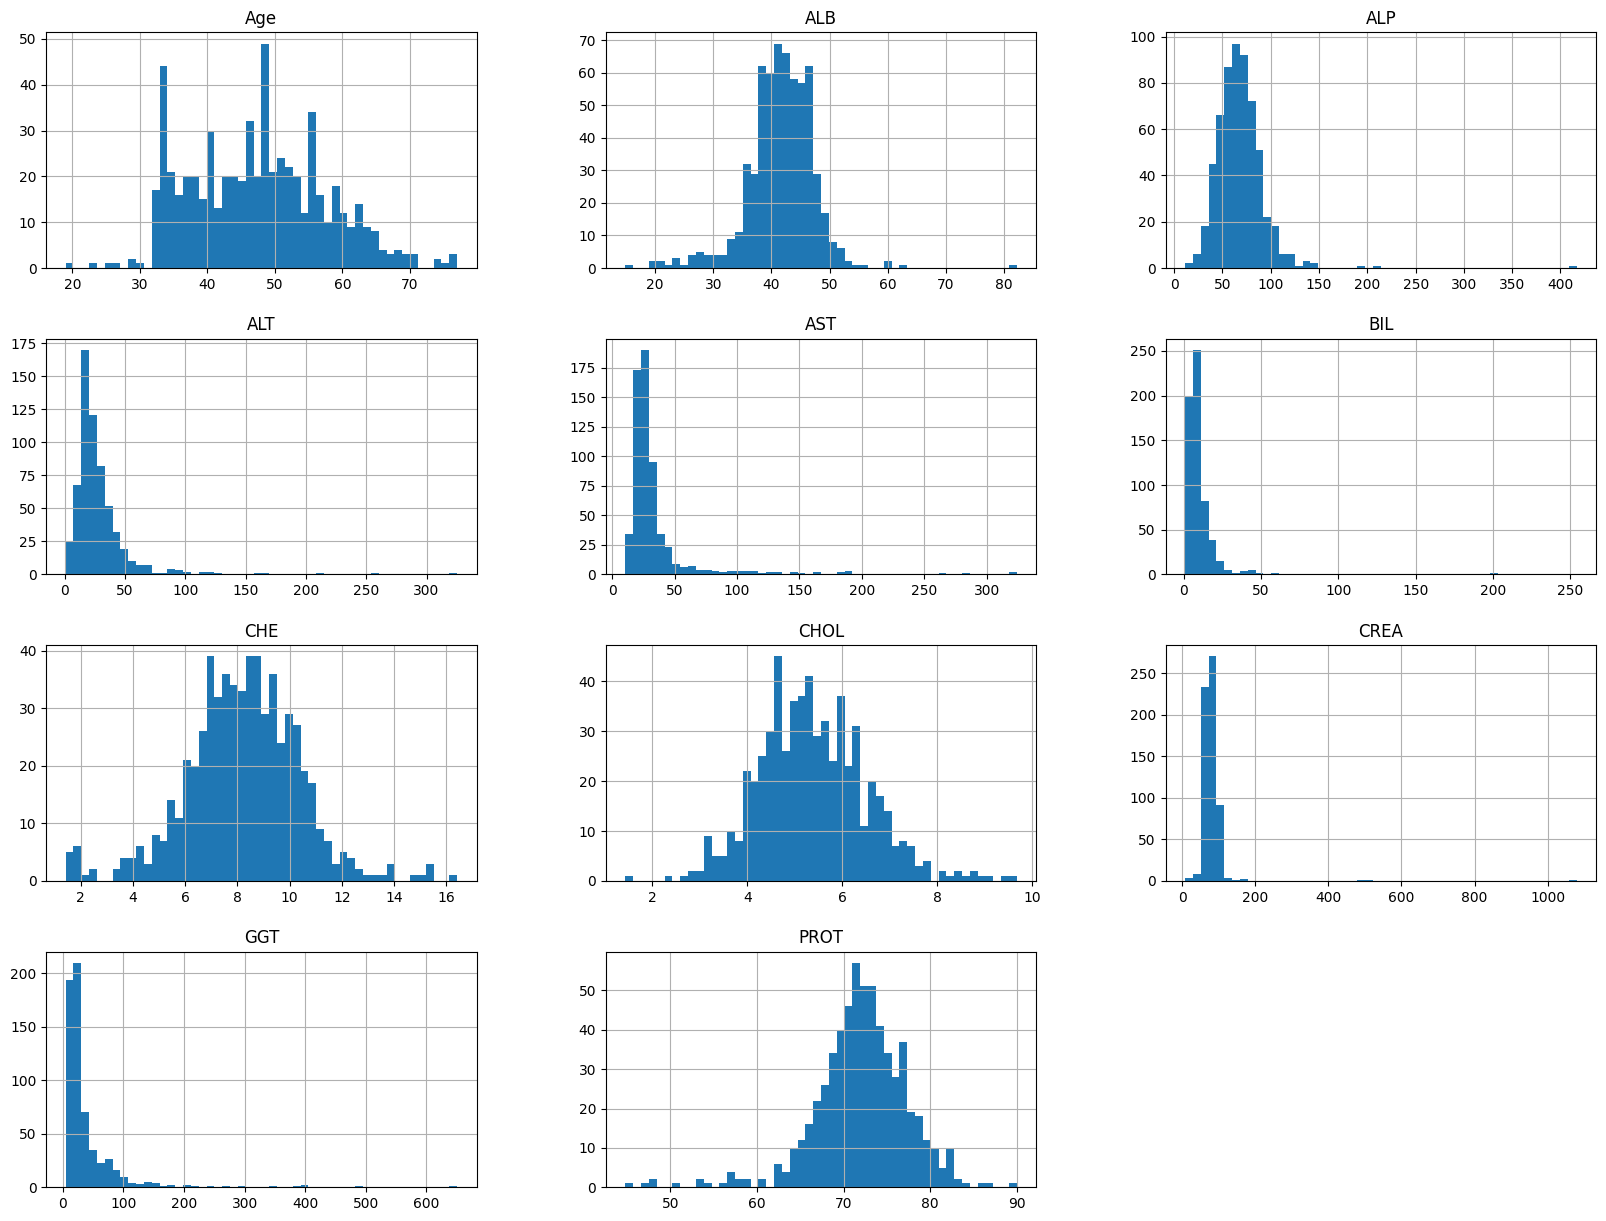

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20, 15))

In [10]:
data[data.ALB.isnull()==True]

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
604,3=Cirrhosis,65,m,NaN,NaN,40.0,54.0,13.0,7.5,NaN,70.0,107.0,79.0


In [11]:
data[data.ALP.isnull()==True]

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
542,1=Hepatitis,19,m,41.0,NaN,87.0,67.0,12.0,7.55,3.9,62.0,65.0,75.0
546,1=Hepatitis,29,m,49.0,NaN,53.0,39.0,15.0,8.79,3.6,79.0,37.0,90.0
547,1=Hepatitis,30,m,45.0,NaN,66.0,45.0,14.0,12.16,6.1,86.0,43.0,77.0
569,2=Fibrosis,49,m,39.0,NaN,118.0,62.0,10.0,7.28,3.5,72.0,74.0,81.0
570,2=Fibrosis,49,m,46.0,NaN,114.0,75.0,16.0,10.43,5.2,72.0,59.0,82.0
571,2=Fibrosis,50,m,42.0,NaN,258.0,106.0,15.0,8.74,4.7,77.0,80.0,84.0
572,2=Fibrosis,53,m,46.0,NaN,34.0,43.0,14.0,8.77,4.0,112.0,203.0,76.0
577,2=Fibrosis,71,m,37.0,NaN,130.0,90.0,15.0,9.92,4.7,79.0,77.0,76.0
582,2=Fibrosis,49,f,39.0,NaN,46.0,39.0,9.0,10.21,3.1,89.0,53.0,79.0
583,2=Fibrosis,51,f,37.0,NaN,164.0,70.0,9.0,3.99,4.2,67.0,43.0,72.0


In [12]:
data[data.ALT.isnull()==True]

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
541,1=Hepatitis,38,m,45.0,56.3,NaN,33.1,7.0,9.58,6.0,77.9,18.9,63.0


In [13]:
data[data.CHOL.isnull()==True]

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
122,0=Blood Donor,43,m,48.6,45.0,10.5,40.5,5.3,7.09,NaN,63.0,25.1,70.0
320,0=Blood Donor,32,f,47.4,52.5,19.1,17.1,4.6,10.19,NaN,63.0,23.0,72.2
330,0=Blood Donor,33,f,42.4,137.2,14.2,13.1,3.4,8.23,NaN,48.0,25.7,74.4
414,0=Blood Donor,46,f,42.9,55.1,15.2,29.8,3.6,8.37,NaN,61.0,29.0,71.9
425,0=Blood Donor,48,f,45.6,107.2,24.4,39.0,13.8,9.77,NaN,88.0,38.0,75.1
434,0=Blood Donor,48,f,46.8,93.3,10.0,23.2,4.3,12.41,NaN,52.0,23.9,72.4
499,0=Blood Donor,57,f,48.4,94.4,2.5,39.6,2.3,8.84,NaN,82.0,6.4,76.8
585,2=Fibrosis,75,f,36.0,NaN,114.0,125.0,14.0,6.65,NaN,57.0,177.0,72.0
591,3=Cirrhosis,46,m,20.0,NaN,62.0,113.0,254.0,1.48,NaN,114.0,138.0,NaN
604,3=Cirrhosis,65,m,NaN,NaN,40.0,54.0,13.0,7.50,NaN,70.0,107.0,79.0


In [14]:
data[data.PROT.isnull()==True]

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
591,3=Cirrhosis,46,m,20.0,NaN,62.0,113.0,254.0,1.48,NaN,114.0,138.0,NaN


In [15]:
# Correlation between feature before the split
# data_filled = data.fillna(data.mean())
# correlation_matrix_before_split = data_filled.corr()
# print("Correlation Matrix Before Splitting:\n", correlation_matrix_before_split)

In [16]:
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix_before_split, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix Before Splitting')
# plt.show()

We observe that there is a correlation between the following: (PROT, ALB), (ALP, GGT), (AST, GGT), (CHOL, CHE)

In [17]:
print("Percentage of male: {:.2f}%".format(len(data[data.Sex=='m'])/len(data)*100), "| Percentage of female: {:.2f}%".format(len(data[data.Sex=='f'])/len(data)*100))

Percentage of male: 61.30% | Percentage of female: 38.70%


In [18]:
# Separate the features from the target
y = data['Category']
X = data.drop(['Category'], axis=1)

In [19]:
X.head()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [20]:
y.head()

1    0=Blood Donor
2    0=Blood Donor
3    0=Blood Donor
4    0=Blood Donor
5    0=Blood Donor
Name: Category, dtype: object

## Data pre-processing

In [21]:
# Distinguish between Categorical and Numerical data

In [22]:
categorical_cols = [cname for cname in X.columns if X[cname].dtype == "object"]
print(categorical_cols)

['Sex']


In [23]:
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]
print(numerical_cols)

['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']


In [24]:
# Preprocessing preparation

In [25]:
numerical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='mean')),    
    ('scale', StandardScaler())
])

In [26]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')) 
])
# We could have been using binary_encoding instead of One-Hot-Encoding, 
# but because there are only one categorical column with only 2 values and a dataset 
# with only 615 samples we opted for the OneHotEncoding

In [27]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
transformers = [
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

In [28]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and Transform the training data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Convert the processed training data into a dataframe
X_train_processed_df = pd.DataFrame(X_train_processed, columns=numerical_cols + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols)))
X_train_processed_df

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Sex_f,Sex_m
0,-0.835559,-0.901069,0.162208,0.027706,-0.257913,-0.280688,-1.157568,-6.395298e-01,-0.080611,-0.322796,-1.056130,0.0,1.0
1,-0.835559,0.726659,-0.254421,-0.320779,-0.346239,1.817927,0.219224,-5.367520e-01,-0.080611,-0.486144,0.667928,0.0,1.0
2,0.591500,0.496654,-0.315969,-0.588518,-0.480152,-0.179486,-0.566162,-3.483261e-01,-0.208413,-0.427632,0.012036,0.0,1.0
3,1.101164,-2.723417,-0.727864,0.478187,1.203739,-0.296667,-1.417786,-1.607354e+00,-0.756136,-0.113126,-3.923313,1.0,0.0
4,-1.447156,0.125108,3.282193,-0.597018,-0.622613,-0.424502,0.039437,7.607084e-16,-0.610077,-0.247217,0.461790,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,-0.937492,-0.317210,-0.235484,1.846631,0.254948,-0.051651,1.302678,1.373202e+00,0.321053,1.278990,0.218173,0.0,1.0
488,-0.631693,0.532040,0.332647,-0.129537,-0.420318,-0.270035,1.037729,-1.007817e+00,-0.135383,-0.295978,0.030776,0.0,1.0
489,1.203097,-0.334903,-0.874631,-0.121038,-0.386128,0.710029,-0.305944,-1.470317e+00,0.083706,-0.417880,-0.006704,0.0,1.0
490,0.081836,0.478961,-0.727864,-0.503522,-0.329143,-0.365911,0.432130,1.176211e+00,-0.135383,-0.622674,0.218173,1.0,0.0


Correlation Matrix After Preprocessing (Training Data):
             Age       ALB       ALP       ALT       AST       BIL       CHE  \
Age    1.000000 -0.199775  0.127874 -0.016273  0.073680  0.038073 -0.055278   
ALB   -0.199775  1.000000 -0.103931 -0.002524 -0.198515 -0.190702  0.330547   
ALP    0.127874 -0.103931  1.000000  0.231388  0.007676  0.019561  0.091467   
ALT   -0.016273 -0.002524  0.231388  1.000000  0.232347 -0.086728  0.142950   
AST    0.073680 -0.198515  0.007676  0.232347  1.000000  0.302727 -0.237370   
BIL    0.038073 -0.190702  0.019561 -0.086728  0.302727  1.000000 -0.350162   
CHE   -0.055278  0.330547  0.091467  0.142950 -0.237370 -0.350162  1.000000   
CHOL   0.144243  0.206447  0.117692  0.046198 -0.235556 -0.191654  0.447747   
CREA  -0.023037 -0.009998  0.201258 -0.065135 -0.020808  0.022775 -0.019170   
GGT    0.088927 -0.113824  0.281374  0.369106  0.558470  0.240706 -0.083688   
PROT  -0.167890  0.557083 -0.052467  0.047730  0.029232 -0.062676  0.30165

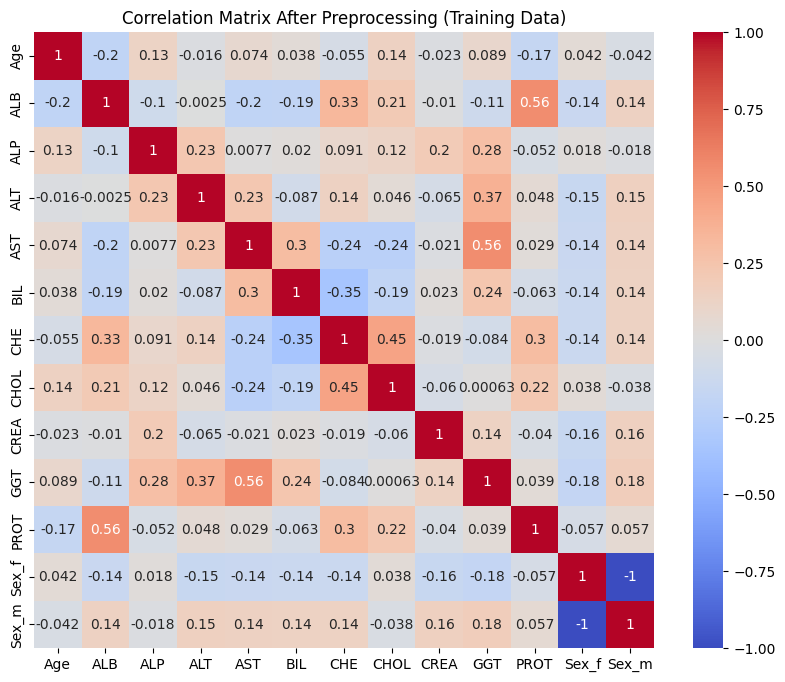

In [29]:
# Calculate the correlation matrix on the processed training data
correlation_matrix_after_preprocessing = X_train_processed_df.corr()
print("Correlation Matrix After Preprocessing (Training Data):\n", correlation_matrix_after_preprocessing)

# Visualize the correlation matrix for training data after split
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_after_preprocessing, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix After Preprocessing (Training Data)')
plt.show()

## Applying Models

### A. Logistic Regression

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [31]:
from sklearn.linear_model import LogisticRegression

Grid Search Result:- Accuracy Before = 0.8943089430894309    |    Accuracy After  = 0.8943089430894309

In [32]:
Logmodel = LogisticRegression(C=1,max_iter=50,random_state=1)

# C: A regularization parameter determining the inverse of regularization strength in logistic regression.
# max_iter: Maximum number of iterations taken for the solvers to converge.
# random_state: Controls the randomness of the algorithm to produce reproducible results.

In [33]:
Logmodel.fit(X_train_processed, y_train)

LogisticRegression(C=1, max_iter=50, random_state=1)

In [34]:
y_pred_Log = Logmodel.predict(X_test_processed)

Accuracy: 0.8943089430894309

Confusion Matrix:



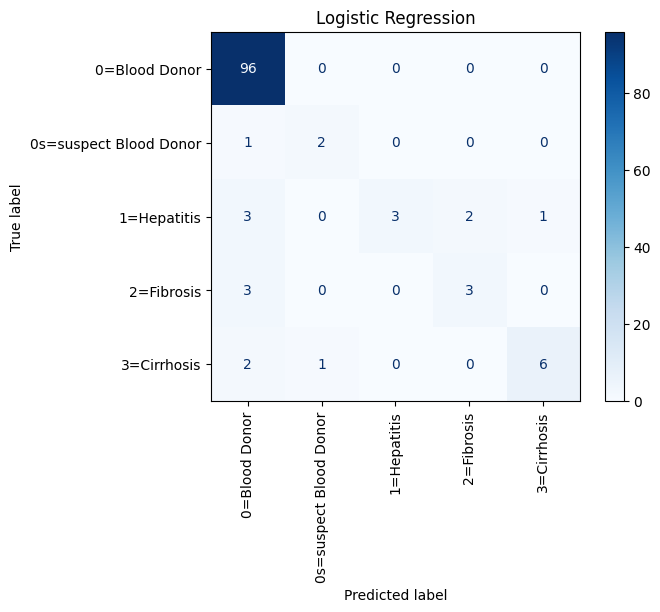

In [35]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred_Log)
print("Accuracy:", accuracy)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_Log)
#print("Confusion Matrix:\n", conf_matrix)
print("\nConfusion Matrix:\n")
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=Logmodel.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation=90)
plt.title("Logistic Regression")
plt.show()

### B. Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier

Grid Search Results:- Accuracy Before =  0.8617886178861789 | Accuracy After  =  0.8780487804878049

In [37]:
DT_clf = DecisionTreeClassifier(criterion='entropy',max_depth=7, random_state=1)

# criterion: A function to measure the quality of a split in decision trees.
# max_depth: The maximum depth of the tree.
# random_state: Controls the randomness of the algorithm to produce reproducible results.

In [38]:
DT_clf.fit(X_train_processed,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=1)

In [39]:
y_pred_DTC = DT_clf.predict(X_test_processed)

Accuracy: 0.8780487804878049

Confusion Matrix:



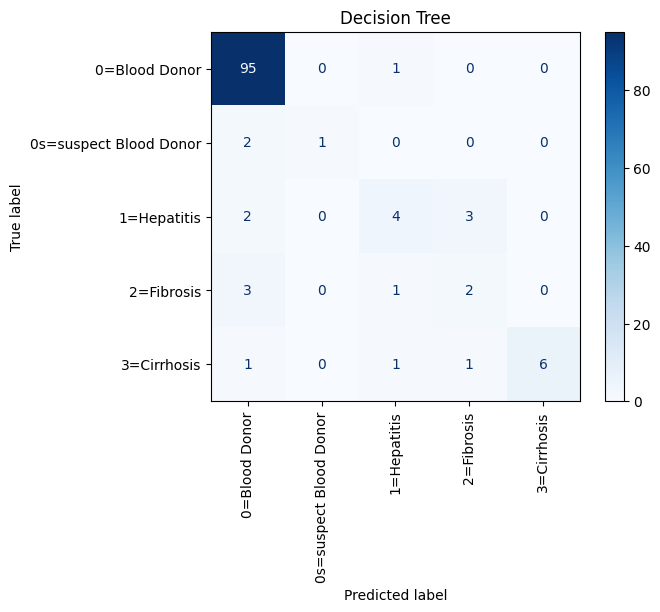

In [40]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred_DTC)
print("Accuracy:", accuracy)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_DTC)
#print("Confusion Matrix:\n", conf_matrix)
print("\nConfusion Matrix:\n")
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=DT_clf.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation=90)
plt.title("Decision Tree")
plt.show()

### C. Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

Grid Search Results:- Accuracy Before =  0.8536585365853658 | Accuracy After  =  0.8617886178861789

In [42]:
RF_clf = RandomForestClassifier(criterion='entropy',max_depth=30,n_estimators=400,random_state=1)  

# criterion: A function to measure the quality of a split in decision trees.
# max_depth: The maximum depth of the tree.
# random_state: Controls the randomness of the algorithm to produce reproducible results.
# n_estimators: The number of trees in the forest.


In [43]:
RF_clf.fit(X_train_processed, y_train)

RandomForestClassifier(criterion='entropy', max_depth=30, n_estimators=400,
                       random_state=1)

In [44]:
y_pred_RF = RF_clf.predict(X_test_processed)

Accuracy: 0.8617886178861789

Confusion Matrix:



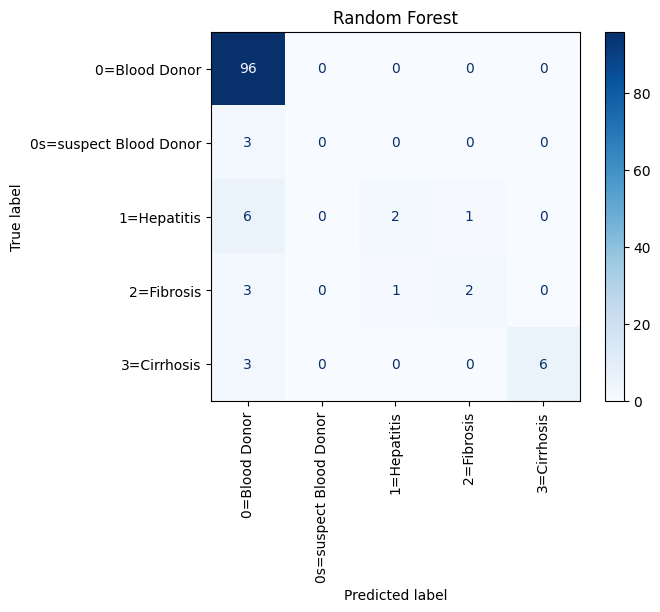

In [45]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred_RF)
print("Accuracy:", accuracy)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_RF)
#print("Confusion Matrix:\n", conf_matrix)
print("\nConfusion Matrix:\n")
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=RF_clf.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation=90)
plt.title("Random Forest")
plt.show()

### D. Stochastic Gradient Descent (SGD)

In [46]:
from sklearn.linear_model import SGDClassifier

Grid Search Results:- Accuracy Before =  0.8699186991869918 | Accuracy After  =  0.8699186991869918

In [47]:
SGD_model = SGDClassifier(alpha=0.001, loss='perceptron',random_state=1)

# alpha: The constant that multiplies the regularization term. Higher values specify stronger regularization.
# loss: The loss function to be used. It defines the objective function to optimize during the training.
# random_state: Controls the randomness of the algorithm to produce reproducible results.

In [48]:
SGD_model.fit(X_train_processed, y_train)

SGDClassifier(alpha=0.001, loss='perceptron', random_state=1)

In [49]:
y_pred_SGD = SGD_model.predict(X_test_processed)

Accuracy: 0.8699186991869918

Confusion Matrix:



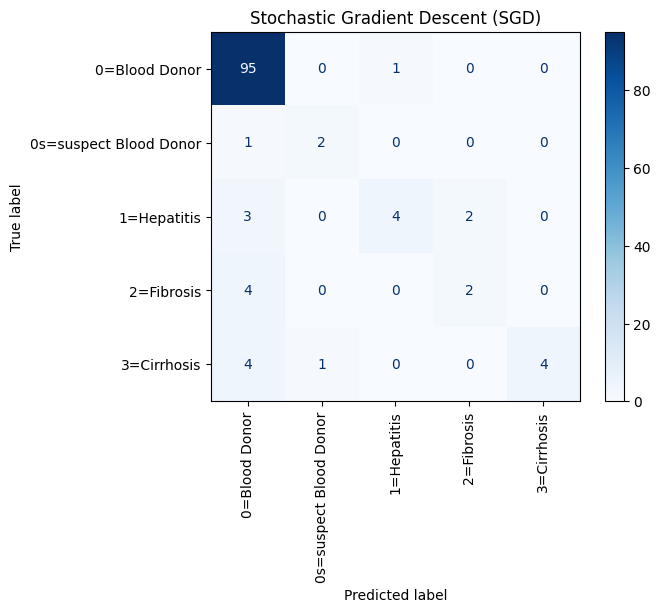

In [50]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred_SGD)
print("Accuracy:", accuracy)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_SGD)
#print("Confusion Matrix:\n", conf_matrix)
print("\nConfusion Matrix:\n")
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=SGD_model.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation=90)
plt.title("Stochastic Gradient Descent (SGD)")
plt.show()

### E. Support Vector Machine (SVM)

In [51]:
from sklearn.svm import SVC

Grid Search Results:- Accuracy Before =  0.8130081300813008 | Accuracy After  =  0.8699186991869918

In [52]:
SVC_model = SVC(C=10,gamma=0.01,random_state=1) 

# C: regularization parameter
# Gamma: kernel coeff.,the ‘spread’ of the kernel/decision region.  
# When gamma is low, the ‘curve’ of the decision boundary.
# is very low and thus the decision region is very broad.


In [53]:
SVC_model.fit(X_train_processed,y_train)

SVC(C=10, gamma=0.01, random_state=1)

In [54]:
y_pred_SVC = SVC_model.predict(X_test_processed)

Accuracy: 0.8699186991869918

Confusion Matrix:



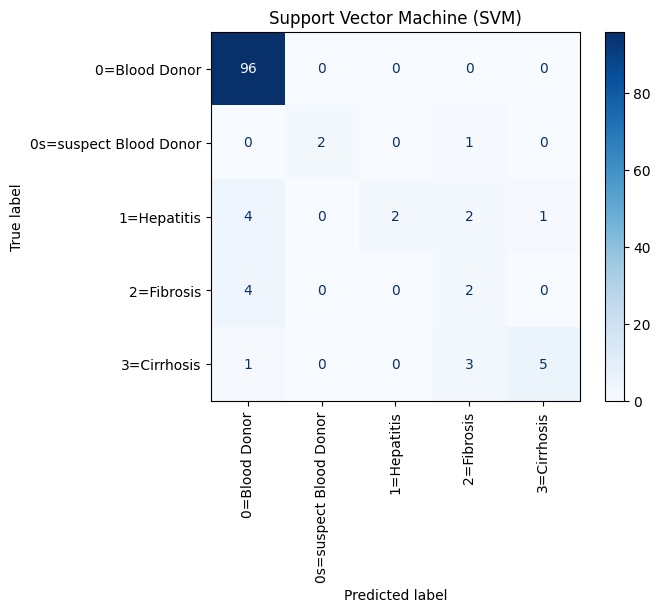

In [55]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred_SVC)
print("Accuracy:", accuracy)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_SVC)
#print("Confusion Matrix:\n", conf_matrix)
print("\nConfusion Matrix:\n")
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=SVC_model.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation=90)
plt.title("Support Vector Machine (SVM)")
plt.show()

## GridSearchCV

In [56]:
from sklearn.model_selection import GridSearchCV 

### A. Logistic Regression GridSearchCV

In [57]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'max_iter': [50, 100, 200, 500],'penalty': ['l1', 'l2']} 
grid_log = GridSearchCV(LogisticRegression(),param_grid,refit=True,verbose=3)


In [58]:
grid_log.fit(X_train_processed,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END ....C=0.001, max_iter=50, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ....C=0.001, max_iter=50, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ....C=0.001, max_iter=50, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ....C=0.001, max_iter=50, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ....C=0.001, max_iter=50, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ..C=0.001, max_iter=50, penalty=l2;, score=0.889 total time=   0.0s
[CV 2/5] END ..C=0.001, max_iter=50, penalty=l2;, score=0.889 total time=   0.0s
[CV 3/5] END ..C=0.001, max_iter=50, penalty=l2;, score=0.888 total time=   0.0s
[CV 4/5] END ..C=0.001, max_iter=50, penalty=l2;, score=0.888 total time=   0.0s
[CV 5/5] END ..C=0.001, max_iter=50, penalty=l2;, score=0.888 total time=   0.0s
[CV 1/5] END ...C=0.001, max_iter=100, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ...C=0.001, max_iter=100, penalty=

C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


[CV 3/5] END .C=0.001, max_iter=100, penalty=l2;, score=0.888 total time=   0.0s
[CV 4/5] END .C=0.001, max_iter=100, penalty=l2;, score=0.888 total time=   0.0s
[CV 5/5] END .C=0.001, max_iter=100, penalty=l2;, score=0.888 total time=   0.0s
[CV 1/5] END ...C=0.001, max_iter=200, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ...C=0.001, max_iter=200, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ...C=0.001, max_iter=200, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ...C=0.001, max_iter=200, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ...C=0.001, max_iter=200, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END .C=0.001, max_iter=200, penalty=l2;, score=0.889 total time=   0.0s
[CV 2/5] END .C=0.001, max_iter=200, penalty=l2;, score=0.889 total time=   0.0s
[CV 3/5] END .C=0.001, max_iter=200, penalty=l2;, score=0.888 total time=   0.0s
[CV 4/5] END .C=0.001, max_iter=200, penalty=l2;, score=0.888 total time=   0.0s
[CV 5/5] END .C=0.001, max_i

C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

[CV 4/5] END ....C=10, max_iter=200, penalty=l2;, score=0.949 total time=   0.0s
[CV 5/5] END ....C=10, max_iter=200, penalty=l2;, score=0.929 total time=   0.0s
[CV 1/5] END ......C=10, max_iter=500, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ......C=10, max_iter=500, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ......C=10, max_iter=500, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ......C=10, max_iter=500, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ......C=10, max_iter=500, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ....C=10, max_iter=500, penalty=l2;, score=0.909 total time=   0.0s
[CV 2/5] END ....C=10, max_iter=500, penalty=l2;, score=0.889 total time=   0.0s
[CV 3/5] END ....C=10, max_iter=500, penalty=l2;, score=0.918 total time=   0.0s
[CV 4/5] END ....C=10, max_iter=500, penalty=l2;, score=0.949 total time=   0.0s
[CV 5/5] END ....C=10, max_iter=500, penalty=l2;, score=0.929 total time=   0.0s
[CV 1/5] END ......C=100, ma

C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

[CV 1/5] END ...C=100, max_iter=100, penalty=l2;, score=0.919 total time=   0.0s
[CV 2/5] END ...C=100, max_iter=100, penalty=l2;, score=0.869 total time=   0.0s
[CV 3/5] END ...C=100, max_iter=100, penalty=l2;, score=0.918 total time=   0.0s
[CV 4/5] END ...C=100, max_iter=100, penalty=l2;, score=0.939 total time=   0.0s
[CV 5/5] END ...C=100, max_iter=100, penalty=l2;, score=0.929 total time=   0.0s
[CV 1/5] END .....C=100, max_iter=200, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END .....C=100, max_iter=200, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END .....C=100, max_iter=200, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END .....C=100, max_iter=200, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END .....C=100, max_iter=200, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ...C=100, max_iter=200, penalty=l2;, score=0.919 total time=   0.0s
[CV 2/5] END ...C=100, max_iter=200, penalty=l2;, score=0.869 total time=   0.0s
[CV 3/5] END ...C=100, max_i

C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\adnan\AppData\Roaming\Python\Python312\sit

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [50, 100, 200, 500],
                         'penalty': ['l1', 'l2']},
             verbose=3)

In [59]:
grid_log.best_params_ 

{'C': 1, 'max_iter': 50, 'penalty': 'l2'}

In [60]:
grid_log.best_estimator_

LogisticRegression(C=1, max_iter=50)

In [61]:
grid_log_predictions = grid_log.predict(X_test_processed)

Accuracy: 0.8943089430894309

Confusion Matrix:



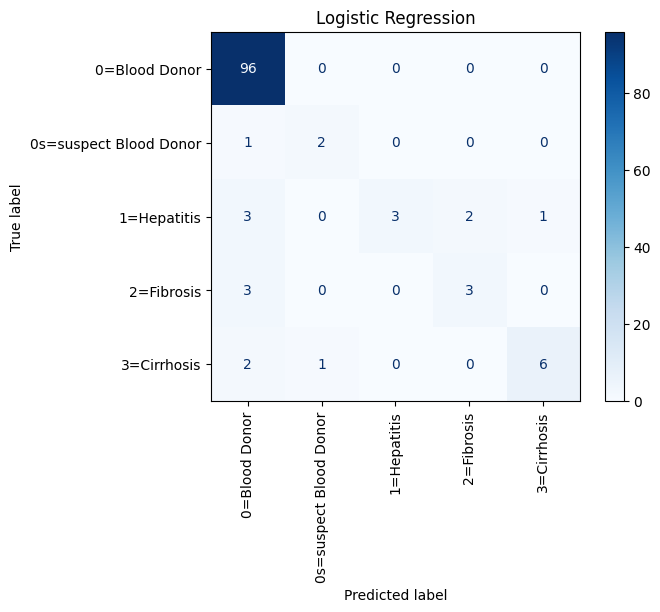

In [62]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, grid_log_predictions)
print("Accuracy:", accuracy)
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, grid_log_predictions)
#print("Confusion Matrix:\n", conf_matrix)
print("\nConfusion Matrix:\n")
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=grid_log.best_estimator_.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation=90)
plt.title("Logistic Regression")
plt.show()

### B. Decision Tree GridSearchCV

In [63]:
param_grid = {'criterion':['gini','entropy','log_loss'],'max_depth': [3, 5, 7, 10, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]} 


grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, refit=True, verbose=3)


In [64]:
grid_dt.fit(X_train_processed, y_train)

Fitting 5 folds for each of 135 candidates, totalling 675 fits
[CV 1/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=0.909 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=0.919 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=0.939 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=0.908 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=0.918 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=0.909 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=0.919 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=0.939 total time=   0.0s
[CV 4/5] END crit

C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


[CV 3/5] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=10;, score=0.959 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=10;, score=0.918 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=10;, score=0.929 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2;, score=0.919 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2;, score=0.919 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2;, score=0.949 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2;, score=0.908 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2;, score=0.918 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_spl

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=3)

In [65]:
grid_dt.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [66]:
grid_dt.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_split=5)

In [67]:
grid_dt_predictions = grid_dt.predict(X_test_processed)

Accuracy: 0.8780487804878049

Confusion Matrix:



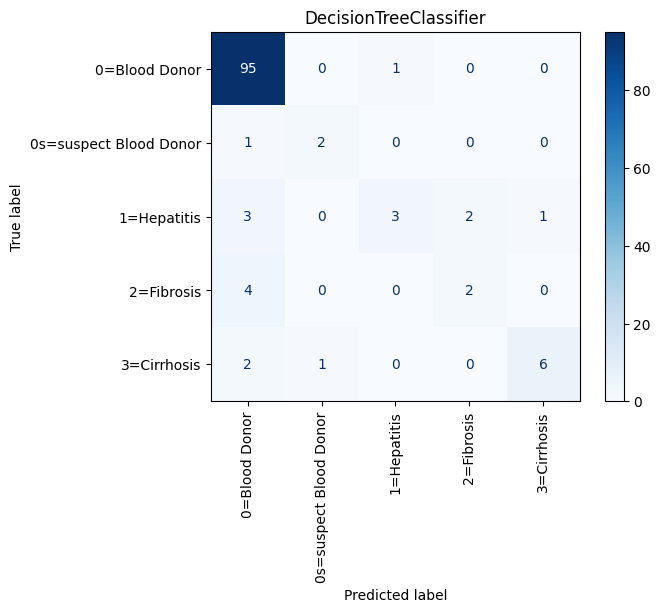

In [68]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, grid_dt_predictions)
print("Accuracy:", accuracy)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, grid_dt_predictions)
#print("Confusion Matrix:\n", conf_matrix)
print("\nConfusion Matrix:\n")
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=grid_dt.best_estimator_.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation=90)
plt.title("DecisionTreeClassifier")
plt.show()

### C. Random Forest GridSearchCV

In [69]:
param_grid = {'n_estimators': [100, 200, 300, 400, 500],'criterion':['gini','entropy','log_loss'],
                'max_depth': [None, 10, 20, 30, 40, 50]} 
grid_rf = GridSearchCV(RandomForestClassifier(),param_grid=param_grid,refit=True,verbose=3)

In [70]:
grid_rf.fit(X_train_processed,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END criterion=gini, max_depth=None, n_estimators=100;, score=0.919 total time=   0.1s


C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


[CV 2/5] END criterion=gini, max_depth=None, n_estimators=100;, score=0.919 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=None, n_estimators=100;, score=0.949 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=None, n_estimators=100;, score=0.939 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=None, n_estimators=100;, score=0.918 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=None, n_estimators=200;, score=0.909 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=None, n_estimators=200;, score=0.919 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=None, n_estimators=200;, score=0.939 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=None, n_estimators=200;, score=0.939 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=None, n_estimators=200;, score=0.918 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=None, n_estimators=300;, score=0.909 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=None, n_est

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=3)

In [71]:
grid_rf.best_params_ 

{'criterion': 'entropy', 'max_depth': None, 'n_estimators': 100}

In [72]:
grid_rf.best_estimator_

RandomForestClassifier(criterion='entropy')

In [73]:
grid_rf_predictions = grid_rf.predict(X_test_processed)

Accuracy: 0.8455284552845529

Confusion Matrix:



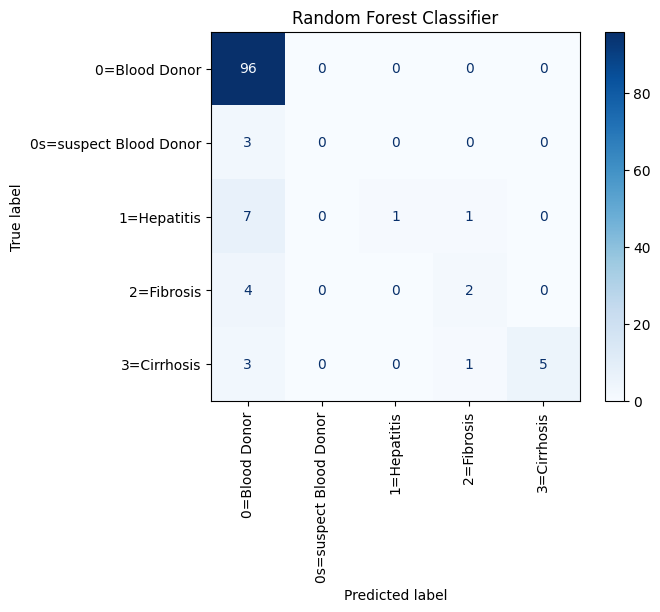

In [74]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, grid_rf_predictions)
print("Accuracy:", accuracy)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, grid_rf_predictions)
#print("Confusion Matrix:\n", conf_matrix)
print("\nConfusion Matrix:\n")
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=grid_rf.best_estimator_.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation=90)
plt.title("Random Forest Classifier")
plt.show()

### D. Stochastic Gradient Descent (SGD) GridSearchCV

In [75]:
param_grid = {'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
              'penalty': ['l2', 'l1', 'elasticnet'],'alpha': [0.0001, 0.001, 0.01, 0.1],
              'eta0': [0.01, 0.1, 0.5, 1.0]} 

grid_sgd = GridSearchCV(SGDClassifier(),param_grid=param_grid,refit=True,verbose=3)

In [76]:
grid_sgd.fit(X_train_processed,y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV 1/5] END alpha=0.0001, eta0=0.01, loss=hinge, penalty=l2;, score=0.909 total time=   0.0s
[CV 2/5] END alpha=0.0001, eta0=0.01, loss=hinge, penalty=l2;, score=0.919 total time=   0.0s
[CV 3/5] END alpha=0.0001, eta0=0.01, loss=hinge, penalty=l2;, score=0.918 total time=   0.0s
[CV 4/5] END alpha=0.0001, eta0=0.01, loss=hinge, penalty=l2;, score=0.959 total time=   0.0s
[CV 5/5] END alpha=0.0001, eta0=0.01, loss=hinge, penalty=l2;, score=0.929 total time=   0.0s
[CV 1/5] END alpha=0.0001, eta0=0.01, loss=hinge, penalty=l1;, score=0.889 total time=   0.0s
[CV 2/5] END alpha=0.0001, eta0=0.01, loss=hinge, penalty=l1;, score=0.929 total time=   0.0s
[CV 3/5] END alpha=0.0001, eta0=0.01, loss=hinge, penalty=l1;, score=0.949 total time=   0.0s
[CV 4/5] END alpha=0.0001, eta0=0.01, loss=hinge, penalty=l1;, score=0.949 total time=   0.0s
[CV 5/5] END alpha=0.0001, eta0=0.01, loss=hinge, penalty=l1;, score=0.918 total time=   0

C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


[CV 5/5] END alpha=0.0001, eta0=0.01, loss=modified_huber, penalty=l1;, score=0.908 total time=   0.0s
[CV 1/5] END alpha=0.0001, eta0=0.01, loss=modified_huber, penalty=elasticnet;, score=0.909 total time=   0.0s
[CV 2/5] END alpha=0.0001, eta0=0.01, loss=modified_huber, penalty=elasticnet;, score=0.919 total time=   0.0s
[CV 3/5] END alpha=0.0001, eta0=0.01, loss=modified_huber, penalty=elasticnet;, score=0.929 total time=   0.0s
[CV 4/5] END alpha=0.0001, eta0=0.01, loss=modified_huber, penalty=elasticnet;, score=0.949 total time=   0.0s
[CV 5/5] END alpha=0.0001, eta0=0.01, loss=modified_huber, penalty=elasticnet;, score=0.939 total time=   0.0s
[CV 1/5] END alpha=0.0001, eta0=0.01, loss=squared_hinge, penalty=l2;, score=0.909 total time=   0.0s
[CV 2/5] END alpha=0.0001, eta0=0.01, loss=squared_hinge, penalty=l2;, score=0.919 total time=   0.0s
[CV 3/5] END alpha=0.0001, eta0=0.01, loss=squared_hinge, penalty=l2;, score=0.939 total time=   0.0s
[CV 4/5] END alpha=0.0001, eta0=0.01

C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END alpha=0.001, eta0=0.01, loss=perceptron, penalty=l1;, score=0.949 total time=   0.0s
[CV 4/5] END alpha=0.001, eta0=0.01, loss=perceptron, penalty=l1;, score=0.929 total time=   0.0s
[CV 5/5] END alpha=0.001, eta0=0.01, loss=perceptron, penalty=l1;, score=0.898 total time=   0.0s
[CV 1/5] END alpha=0.001, eta0=0.01, loss=perceptron, penalty=elasticnet;, score=0.919 total time=   0.0s
[CV 2/5] END alpha=0.001, eta0=0.01, loss=perceptron, penalty=elasticnet;, score=0.919 total time=   0.0s
[CV 3/5] END alpha=0.001, eta0=0.01, loss=perceptron, penalty=elasticnet;, score=0.949 total time=   0.0s
[CV 4/5] END alpha=0.001, eta0=0.01, loss=perceptron, penalty=elasticnet;, score=0.939 total time=   0.0s
[CV 5/5] END alpha=0.001, eta0=0.01, loss=perceptron, penalty=elasticnet;, score=0.908 total time=   0.0s
[CV 1/5] END alpha=0.001, eta0=0.1, loss=hinge, penalty=l2;, score=0.919 total time=   0.0s
[CV 2/5] END alpha=0.001, eta0=0.1, loss=hinge, penalty=l2;, score=0.919 total time=

C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END alpha=0.001, eta0=0.1, loss=squared_hinge, penalty=l1;, score=0.949 total time=   0.0s
[CV 5/5] END alpha=0.001, eta0=0.1, loss=squared_hinge, penalty=l1;, score=0.918 total time=   0.0s
[CV 1/5] END alpha=0.001, eta0=0.1, loss=squared_hinge, penalty=elasticnet;, score=0.919 total time=   0.0s
[CV 2/5] END alpha=0.001, eta0=0.1, loss=squared_hinge, penalty=elasticnet;, score=0.929 total time=   0.0s
[CV 3/5] END alpha=0.001, eta0=0.1, loss=squared_hinge, penalty=elasticnet;, score=0.929 total time=   0.0s
[CV 4/5] END alpha=0.001, eta0=0.1, loss=squared_hinge, penalty=elasticnet;, score=0.969 total time=   0.0s
[CV 5/5] END alpha=0.001, eta0=0.1, loss=squared_hinge, penalty=elasticnet;, score=0.898 total time=   0.0s
[CV 1/5] END alpha=0.001, eta0=0.1, loss=perceptron, penalty=l2;, score=0.919 total time=   0.0s
[CV 2/5] END alpha=0.001, eta0=0.1, loss=perceptron, penalty=l2;, score=0.919 total time=   0.0s
[CV 3/5] END alpha=0.001, eta0=0.1, loss=perceptron, penalty=l2;, 

C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END alpha=0.001, eta0=0.5, loss=squared_hinge, penalty=elasticnet;, score=0.929 total time=   0.0s
[CV 2/5] END alpha=0.001, eta0=0.5, loss=squared_hinge, penalty=elasticnet;, score=0.909 total time=   0.0s
[CV 3/5] END alpha=0.001, eta0=0.5, loss=squared_hinge, penalty=elasticnet;, score=0.949 total time=   0.0s
[CV 4/5] END alpha=0.001, eta0=0.5, loss=squared_hinge, penalty=elasticnet;, score=0.949 total time=   0.0s
[CV 5/5] END alpha=0.001, eta0=0.5, loss=squared_hinge, penalty=elasticnet;, score=0.918 total time=   0.0s
[CV 1/5] END alpha=0.001, eta0=0.5, loss=perceptron, penalty=l2;, score=0.919 total time=   0.0s
[CV 2/5] END alpha=0.001, eta0=0.5, loss=perceptron, penalty=l2;, score=0.899 total time=   0.0s
[CV 3/5] END alpha=0.001, eta0=0.5, loss=perceptron, penalty=l2;, score=0.939 total time=   0.0s
[CV 4/5] END alpha=0.001, eta0=0.5, loss=perceptron, penalty=l2;, score=0.959 total time=   0.0s
[CV 5/5] END alpha=0.001, eta0=0.5, loss=perceptron, penalty=l2;, score=

C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END alpha=0.001, eta0=1.0, loss=squared_hinge, penalty=elasticnet;, score=0.929 total time=   0.0s
[CV 1/5] END alpha=0.001, eta0=1.0, loss=perceptron, penalty=l2;, score=0.919 total time=   0.0s
[CV 2/5] END alpha=0.001, eta0=1.0, loss=perceptron, penalty=l2;, score=0.919 total time=   0.0s
[CV 3/5] END alpha=0.001, eta0=1.0, loss=perceptron, penalty=l2;, score=0.939 total time=   0.0s
[CV 4/5] END alpha=0.001, eta0=1.0, loss=perceptron, penalty=l2;, score=0.949 total time=   0.0s
[CV 5/5] END alpha=0.001, eta0=1.0, loss=perceptron, penalty=l2;, score=0.908 total time=   0.0s
[CV 1/5] END alpha=0.001, eta0=1.0, loss=perceptron, penalty=l1;, score=0.899 total time=   0.0s
[CV 2/5] END alpha=0.001, eta0=1.0, loss=perceptron, penalty=l1;, score=0.919 total time=   0.0s
[CV 3/5] END alpha=0.001, eta0=1.0, loss=perceptron, penalty=l1;, score=0.908 total time=   0.0s
[CV 4/5] END alpha=0.001, eta0=1.0, loss=perceptron, penalty=l1;, score=0.949 total time=   0.0s
[CV 5/5] END alpha=

C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
 

[CV 5/5] END alpha=0.01, eta0=0.01, loss=squared_hinge, penalty=l2;, score=0.908 total time=   0.0s
[CV 1/5] END alpha=0.01, eta0=0.01, loss=squared_hinge, penalty=l1;, score=0.909 total time=   0.0s
[CV 2/5] END alpha=0.01, eta0=0.01, loss=squared_hinge, penalty=l1;, score=0.929 total time=   0.0s
[CV 3/5] END alpha=0.01, eta0=0.01, loss=squared_hinge, penalty=l1;, score=0.939 total time=   0.0s


C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
 

[CV 4/5] END alpha=0.01, eta0=0.01, loss=squared_hinge, penalty=l1;, score=0.949 total time=   0.0s
[CV 5/5] END alpha=0.01, eta0=0.01, loss=squared_hinge, penalty=l1;, score=0.929 total time=   0.0s
[CV 1/5] END alpha=0.01, eta0=0.01, loss=squared_hinge, penalty=elasticnet;, score=0.919 total time=   0.0s


C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
 

[CV 2/5] END alpha=0.01, eta0=0.01, loss=squared_hinge, penalty=elasticnet;, score=0.899 total time=   0.0s
[CV 3/5] END alpha=0.01, eta0=0.01, loss=squared_hinge, penalty=elasticnet;, score=0.939 total time=   0.0s
[CV 4/5] END alpha=0.01, eta0=0.01, loss=squared_hinge, penalty=elasticnet;, score=0.959 total time=   0.0s
[CV 5/5] END alpha=0.01, eta0=0.01, loss=squared_hinge, penalty=elasticnet;, score=0.908 total time=   0.0s
[CV 1/5] END alpha=0.01, eta0=0.01, loss=perceptron, penalty=l2;, score=0.919 total time=   0.0s
[CV 2/5] END alpha=0.01, eta0=0.01, loss=perceptron, penalty=l2;, score=0.909 total time=   0.0s
[CV 3/5] END alpha=0.01, eta0=0.01, loss=perceptron, penalty=l2;, score=0.949 total time=   0.0s
[CV 4/5] END alpha=0.01, eta0=0.01, loss=perceptron, penalty=l2;, score=0.959 total time=   0.0s
[CV 5/5] END alpha=0.01, eta0=0.01, loss=perceptron, penalty=l2;, score=0.918 total time=   0.0s
[CV 1/5] END alpha=0.01, eta0=0.01, loss=perceptron, penalty=l1;, score=0.929 total

C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
 

[CV 1/5] END alpha=0.01, eta0=0.1, loss=squared_hinge, penalty=l1;, score=0.889 total time=   0.0s
[CV 2/5] END alpha=0.01, eta0=0.1, loss=squared_hinge, penalty=l1;, score=0.919 total time=   0.0s
[CV 3/5] END alpha=0.01, eta0=0.1, loss=squared_hinge, penalty=l1;, score=0.918 total time=   0.0s
[CV 4/5] END alpha=0.01, eta0=0.1, loss=squared_hinge, penalty=l1;, score=0.939 total time=   0.0s
[CV 5/5] END alpha=0.01, eta0=0.1, loss=squared_hinge, penalty=l1;, score=0.929 total time=   0.0s


C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
 

[CV 1/5] END alpha=0.01, eta0=0.1, loss=squared_hinge, penalty=elasticnet;, score=0.919 total time=   0.0s
[CV 2/5] END alpha=0.01, eta0=0.1, loss=squared_hinge, penalty=elasticnet;, score=0.909 total time=   0.0s
[CV 3/5] END alpha=0.01, eta0=0.1, loss=squared_hinge, penalty=elasticnet;, score=0.918 total time=   0.0s
[CV 4/5] END alpha=0.01, eta0=0.1, loss=squared_hinge, penalty=elasticnet;, score=0.959 total time=   0.0s


C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END alpha=0.01, eta0=0.1, loss=squared_hinge, penalty=elasticnet;, score=0.918 total time=   0.0s
[CV 1/5] END alpha=0.01, eta0=0.1, loss=perceptron, penalty=l2;, score=0.919 total time=   0.0s
[CV 2/5] END alpha=0.01, eta0=0.1, loss=perceptron, penalty=l2;, score=0.909 total time=   0.0s
[CV 3/5] END alpha=0.01, eta0=0.1, loss=perceptron, penalty=l2;, score=0.949 total time=   0.0s
[CV 4/5] END alpha=0.01, eta0=0.1, loss=perceptron, penalty=l2;, score=0.959 total time=   0.0s
[CV 5/5] END alpha=0.01, eta0=0.1, loss=perceptron, penalty=l2;, score=0.918 total time=   0.0s
[CV 1/5] END alpha=0.01, eta0=0.1, loss=perceptron, penalty=l1;, score=0.889 total time=   0.0s
[CV 2/5] END alpha=0.01, eta0=0.1, loss=perceptron, penalty=l1;, score=0.929 total time=   0.0s
[CV 3/5] END alpha=0.01, eta0=0.1, loss=perceptron, penalty=l1;, score=0.949 total time=   0.0s
[CV 4/5] END alpha=0.01, eta0=0.1, loss=perceptron, penalty=l1;, score=0.959 total time=   0.0s
[CV 5/5] END alpha=0.01, eta0

C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
 

[CV 5/5] END alpha=0.01, eta0=0.5, loss=squared_hinge, penalty=l2;, score=0.918 total time=   0.0s
[CV 1/5] END alpha=0.01, eta0=0.5, loss=squared_hinge, penalty=l1;, score=0.919 total time=   0.0s
[CV 2/5] END alpha=0.01, eta0=0.5, loss=squared_hinge, penalty=l1;, score=0.919 total time=   0.0s
[CV 3/5] END alpha=0.01, eta0=0.5, loss=squared_hinge, penalty=l1;, score=0.898 total time=   0.0s
[CV 4/5] END alpha=0.01, eta0=0.5, loss=squared_hinge, penalty=l1;, score=0.949 total time=   0.0s


C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
 

[CV 5/5] END alpha=0.01, eta0=0.5, loss=squared_hinge, penalty=l1;, score=0.918 total time=   0.0s
[CV 1/5] END alpha=0.01, eta0=0.5, loss=squared_hinge, penalty=elasticnet;, score=0.909 total time=   0.0s
[CV 2/5] END alpha=0.01, eta0=0.5, loss=squared_hinge, penalty=elasticnet;, score=0.919 total time=   0.0s
[CV 3/5] END alpha=0.01, eta0=0.5, loss=squared_hinge, penalty=elasticnet;, score=0.918 total time=   0.0s


C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END alpha=0.01, eta0=0.5, loss=squared_hinge, penalty=elasticnet;, score=0.969 total time=   0.0s
[CV 5/5] END alpha=0.01, eta0=0.5, loss=squared_hinge, penalty=elasticnet;, score=0.918 total time=   0.0s
[CV 1/5] END alpha=0.01, eta0=0.5, loss=perceptron, penalty=l2;, score=0.919 total time=   0.0s
[CV 2/5] END alpha=0.01, eta0=0.5, loss=perceptron, penalty=l2;, score=0.919 total time=   0.0s
[CV 3/5] END alpha=0.01, eta0=0.5, loss=perceptron, penalty=l2;, score=0.939 total time=   0.0s
[CV 4/5] END alpha=0.01, eta0=0.5, loss=perceptron, penalty=l2;, score=0.949 total time=   0.0s
[CV 5/5] END alpha=0.01, eta0=0.5, loss=perceptron, penalty=l2;, score=0.929 total time=   0.0s
[CV 1/5] END alpha=0.01, eta0=0.5, loss=perceptron, penalty=l1;, score=0.899 total time=   0.0s
[CV 2/5] END alpha=0.01, eta0=0.5, loss=perceptron, penalty=l1;, score=0.929 total time=   0.0s
[CV 3/5] END alpha=0.01, eta0=0.5, loss=perceptron, penalty=l1;, score=0.918 total time=   0.0s
[CV 4/5] END alpha

C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
 

[CV 4/5] END alpha=0.01, eta0=1.0, loss=squared_hinge, penalty=l2;, score=0.949 total time=   0.0s
[CV 5/5] END alpha=0.01, eta0=1.0, loss=squared_hinge, penalty=l2;, score=0.918 total time=   0.0s
[CV 1/5] END alpha=0.01, eta0=1.0, loss=squared_hinge, penalty=l1;, score=0.889 total time=   0.0s
[CV 2/5] END alpha=0.01, eta0=1.0, loss=squared_hinge, penalty=l1;, score=0.949 total time=   0.0s


C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
 

[CV 3/5] END alpha=0.01, eta0=1.0, loss=squared_hinge, penalty=l1;, score=0.949 total time=   0.0s
[CV 4/5] END alpha=0.01, eta0=1.0, loss=squared_hinge, penalty=l1;, score=0.939 total time=   0.0s
[CV 5/5] END alpha=0.01, eta0=1.0, loss=squared_hinge, penalty=l1;, score=0.908 total time=   0.0s
[CV 1/5] END alpha=0.01, eta0=1.0, loss=squared_hinge, penalty=elasticnet;, score=0.919 total time=   0.0s


C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
 

[CV 2/5] END alpha=0.01, eta0=1.0, loss=squared_hinge, penalty=elasticnet;, score=0.919 total time=   0.0s
[CV 3/5] END alpha=0.01, eta0=1.0, loss=squared_hinge, penalty=elasticnet;, score=0.918 total time=   0.0s
[CV 4/5] END alpha=0.01, eta0=1.0, loss=squared_hinge, penalty=elasticnet;, score=0.959 total time=   0.0s


C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END alpha=0.01, eta0=1.0, loss=squared_hinge, penalty=elasticnet;, score=0.918 total time=   0.0s
[CV 1/5] END alpha=0.01, eta0=1.0, loss=perceptron, penalty=l2;, score=0.919 total time=   0.0s
[CV 2/5] END alpha=0.01, eta0=1.0, loss=perceptron, penalty=l2;, score=0.919 total time=   0.0s
[CV 3/5] END alpha=0.01, eta0=1.0, loss=perceptron, penalty=l2;, score=0.939 total time=   0.0s
[CV 4/5] END alpha=0.01, eta0=1.0, loss=perceptron, penalty=l2;, score=0.959 total time=   0.0s
[CV 5/5] END alpha=0.01, eta0=1.0, loss=perceptron, penalty=l2;, score=0.908 total time=   0.0s
[CV 1/5] END alpha=0.01, eta0=1.0, loss=perceptron, penalty=l1;, score=0.929 total time=   0.0s
[CV 2/5] END alpha=0.01, eta0=1.0, loss=perceptron, penalty=l1;, score=0.899 total time=   0.0s
[CV 3/5] END alpha=0.01, eta0=1.0, loss=perceptron, penalty=l1;, score=0.918 total time=   0.0s
[CV 4/5] END alpha=0.01, eta0=1.0, loss=perceptron, penalty=l1;, score=0.939 total time=   0.0s
[CV 5/5] END alpha=0.01, eta0

C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
 

[CV 1/5] END alpha=0.1, eta0=0.01, loss=squared_hinge, penalty=l2;, score=0.919 total time=   0.0s
[CV 2/5] END alpha=0.1, eta0=0.01, loss=squared_hinge, penalty=l2;, score=0.919 total time=   0.0s
[CV 3/5] END alpha=0.1, eta0=0.01, loss=squared_hinge, penalty=l2;, score=0.918 total time=   0.0s
[CV 4/5] END alpha=0.1, eta0=0.01, loss=squared_hinge, penalty=l2;, score=0.939 total time=   0.0s
[CV 5/5] END alpha=0.1, eta0=0.01, loss=squared_hinge, penalty=l2;, score=0.918 total time=   0.0s


C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END alpha=0.1, eta0=0.01, loss=squared_hinge, penalty=l1;, score=0.818 total time=   0.0s
[CV 2/5] END alpha=0.1, eta0=0.01, loss=squared_hinge, penalty=l1;, score=0.838 total time=   0.0s
[CV 3/5] END alpha=0.1, eta0=0.01, loss=squared_hinge, penalty=l1;, score=0.888 total time=   0.0s


C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END alpha=0.1, eta0=0.01, loss=squared_hinge, penalty=l1;, score=0.918 total time=   0.0s
[CV 5/5] END alpha=0.1, eta0=0.01, loss=squared_hinge, penalty=l1;, score=0.857 total time=   0.0s
[CV 1/5] END alpha=0.1, eta0=0.01, loss=squared_hinge, penalty=elasticnet;, score=0.909 total time=   0.0s


C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
 

[CV 2/5] END alpha=0.1, eta0=0.01, loss=squared_hinge, penalty=elasticnet;, score=0.889 total time=   0.0s
[CV 3/5] END alpha=0.1, eta0=0.01, loss=squared_hinge, penalty=elasticnet;, score=0.918 total time=   0.0s
[CV 4/5] END alpha=0.1, eta0=0.01, loss=squared_hinge, penalty=elasticnet;, score=0.929 total time=   0.0s
[CV 5/5] END alpha=0.1, eta0=0.01, loss=squared_hinge, penalty=elasticnet;, score=0.939 total time=   0.0s
[CV 1/5] END alpha=0.1, eta0=0.01, loss=perceptron, penalty=l2;, score=0.919 total time=   0.0s
[CV 2/5] END alpha=0.1, eta0=0.01, loss=perceptron, penalty=l2;, score=0.919 total time=   0.0s
[CV 3/5] END alpha=0.1, eta0=0.01, loss=perceptron, penalty=l2;, score=0.918 total time=   0.0s
[CV 4/5] END alpha=0.1, eta0=0.01, loss=perceptron, penalty=l2;, score=0.929 total time=   0.0s
[CV 5/5] END alpha=0.1, eta0=0.01, loss=perceptron, penalty=l2;, score=0.918 total time=   0.0s
[CV 1/5] END alpha=0.1, eta0=0.01, loss=perceptron, penalty=l1;, score=0.889 total time=   0

C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
 

[CV 4/5] END alpha=0.1, eta0=0.1, loss=squared_hinge, penalty=l2;, score=0.929 total time=   0.0s
[CV 5/5] END alpha=0.1, eta0=0.1, loss=squared_hinge, penalty=l2;, score=0.918 total time=   0.0s
[CV 1/5] END alpha=0.1, eta0=0.1, loss=squared_hinge, penalty=l1;, score=0.848 total time=   0.0s


C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END alpha=0.1, eta0=0.1, loss=squared_hinge, penalty=l1;, score=0.869 total time=   0.0s
[CV 3/5] END alpha=0.1, eta0=0.1, loss=squared_hinge, penalty=l1;, score=0.898 total time=   0.0s


C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END alpha=0.1, eta0=0.1, loss=squared_hinge, penalty=l1;, score=0.918 total time=   0.0s
[CV 5/5] END alpha=0.1, eta0=0.1, loss=squared_hinge, penalty=l1;, score=0.898 total time=   0.0s
[CV 1/5] END alpha=0.1, eta0=0.1, loss=squared_hinge, penalty=elasticnet;, score=0.919 total time=   0.0s


C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END alpha=0.1, eta0=0.1, loss=squared_hinge, penalty=elasticnet;, score=0.899 total time=   0.0s
[CV 3/5] END alpha=0.1, eta0=0.1, loss=squared_hinge, penalty=elasticnet;, score=0.908 total time=   0.0s
[CV 4/5] END alpha=0.1, eta0=0.1, loss=squared_hinge, penalty=elasticnet;, score=0.939 total time=   0.0s


C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END alpha=0.1, eta0=0.1, loss=squared_hinge, penalty=elasticnet;, score=0.929 total time=   0.0s
[CV 1/5] END alpha=0.1, eta0=0.1, loss=perceptron, penalty=l2;, score=0.909 total time=   0.0s
[CV 2/5] END alpha=0.1, eta0=0.1, loss=perceptron, penalty=l2;, score=0.919 total time=   0.0s
[CV 3/5] END alpha=0.1, eta0=0.1, loss=perceptron, penalty=l2;, score=0.929 total time=   0.0s
[CV 4/5] END alpha=0.1, eta0=0.1, loss=perceptron, penalty=l2;, score=0.939 total time=   0.0s
[CV 5/5] END alpha=0.1, eta0=0.1, loss=perceptron, penalty=l2;, score=0.929 total time=   0.0s
[CV 1/5] END alpha=0.1, eta0=0.1, loss=perceptron, penalty=l1;, score=0.889 total time=   0.0s
[CV 2/5] END alpha=0.1, eta0=0.1, loss=perceptron, penalty=l1;, score=0.879 total time=   0.0s
[CV 3/5] END alpha=0.1, eta0=0.1, loss=perceptron, penalty=l1;, score=0.898 total time=   0.0s
[CV 4/5] END alpha=0.1, eta0=0.1, loss=perceptron, penalty=l1;, score=0.888 total time=   0.0s
[CV 5/5] END alpha=0.1, eta0=0.1, loss=

C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
 

[CV 3/5] END alpha=0.1, eta0=0.5, loss=squared_hinge, penalty=l2;, score=0.929 total time=   0.0s
[CV 4/5] END alpha=0.1, eta0=0.5, loss=squared_hinge, penalty=l2;, score=0.918 total time=   0.0s
[CV 5/5] END alpha=0.1, eta0=0.5, loss=squared_hinge, penalty=l2;, score=0.908 total time=   0.0s


C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END alpha=0.1, eta0=0.5, loss=squared_hinge, penalty=l1;, score=0.848 total time=   0.0s
[CV 2/5] END alpha=0.1, eta0=0.5, loss=squared_hinge, penalty=l1;, score=0.909 total time=   0.0s


C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END alpha=0.1, eta0=0.5, loss=squared_hinge, penalty=l1;, score=0.929 total time=   0.0s
[CV 4/5] END alpha=0.1, eta0=0.5, loss=squared_hinge, penalty=l1;, score=0.959 total time=   0.0s
[CV 5/5] END alpha=0.1, eta0=0.5, loss=squared_hinge, penalty=l1;, score=0.827 total time=   0.0s


C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
 

[CV 1/5] END alpha=0.1, eta0=0.5, loss=squared_hinge, penalty=elasticnet;, score=0.899 total time=   0.0s
[CV 2/5] END alpha=0.1, eta0=0.5, loss=squared_hinge, penalty=elasticnet;, score=0.889 total time=   0.0s
[CV 3/5] END alpha=0.1, eta0=0.5, loss=squared_hinge, penalty=elasticnet;, score=0.918 total time=   0.0s
[CV 4/5] END alpha=0.1, eta0=0.5, loss=squared_hinge, penalty=elasticnet;, score=0.939 total time=   0.0s


C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END alpha=0.1, eta0=0.5, loss=squared_hinge, penalty=elasticnet;, score=0.918 total time=   0.0s
[CV 1/5] END alpha=0.1, eta0=0.5, loss=perceptron, penalty=l2;, score=0.919 total time=   0.0s
[CV 2/5] END alpha=0.1, eta0=0.5, loss=perceptron, penalty=l2;, score=0.909 total time=   0.0s
[CV 3/5] END alpha=0.1, eta0=0.5, loss=perceptron, penalty=l2;, score=0.918 total time=   0.0s
[CV 4/5] END alpha=0.1, eta0=0.5, loss=perceptron, penalty=l2;, score=0.929 total time=   0.0s
[CV 5/5] END alpha=0.1, eta0=0.5, loss=perceptron, penalty=l2;, score=0.929 total time=   0.0s
[CV 1/5] END alpha=0.1, eta0=0.5, loss=perceptron, penalty=l1;, score=0.889 total time=   0.0s
[CV 2/5] END alpha=0.1, eta0=0.5, loss=perceptron, penalty=l1;, score=0.030 total time=   0.0s
[CV 3/5] END alpha=0.1, eta0=0.5, loss=perceptron, penalty=l1;, score=0.888 total time=   0.0s
[CV 4/5] END alpha=0.1, eta0=0.5, loss=perceptron, penalty=l1;, score=0.888 total time=   0.0s
[CV 5/5] END alpha=0.1, eta0=0.5, loss=

C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
 

[CV 3/5] END alpha=0.1, eta0=1.0, loss=squared_hinge, penalty=l2;, score=0.929 total time=   0.0s
[CV 4/5] END alpha=0.1, eta0=1.0, loss=squared_hinge, penalty=l2;, score=0.929 total time=   0.0s
[CV 5/5] END alpha=0.1, eta0=1.0, loss=squared_hinge, penalty=l2;, score=0.908 total time=   0.0s


C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END alpha=0.1, eta0=1.0, loss=squared_hinge, penalty=l1;, score=0.838 total time=   0.0s
[CV 2/5] END alpha=0.1, eta0=1.0, loss=squared_hinge, penalty=l1;, score=0.818 total time=   0.0s
[CV 3/5] END alpha=0.1, eta0=1.0, loss=squared_hinge, penalty=l1;, score=0.908 total time=   0.0s


C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END alpha=0.1, eta0=1.0, loss=squared_hinge, penalty=l1;, score=0.939 total time=   0.0s
[CV 5/5] END alpha=0.1, eta0=1.0, loss=squared_hinge, penalty=l1;, score=0.847 total time=   0.0s
[CV 1/5] END alpha=0.1, eta0=1.0, loss=squared_hinge, penalty=elasticnet;, score=0.919 total time=   0.0s


C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END alpha=0.1, eta0=1.0, loss=squared_hinge, penalty=elasticnet;, score=0.889 total time=   0.0s
[CV 3/5] END alpha=0.1, eta0=1.0, loss=squared_hinge, penalty=elasticnet;, score=0.918 total time=   0.0s
[CV 4/5] END alpha=0.1, eta0=1.0, loss=squared_hinge, penalty=elasticnet;, score=0.939 total time=   0.0s
[CV 5/5] END alpha=0.1, eta0=1.0, loss=squared_hinge, penalty=elasticnet;, score=0.929 total time=   0.0s
[CV 1/5] END alpha=0.1, eta0=1.0, loss=perceptron, penalty=l2;, score=0.909 total time=   0.0s
[CV 2/5] END alpha=0.1, eta0=1.0, loss=perceptron, penalty=l2;, score=0.919 total time=   0.0s
[CV 3/5] END alpha=0.1, eta0=1.0, loss=perceptron, penalty=l2;, score=0.918 total time=   0.0s
[CV 4/5] END alpha=0.1, eta0=1.0, loss=perceptron, penalty=l2;, score=0.929 total time=   0.0s
[CV 5/5] END alpha=0.1, eta0=1.0, loss=perceptron, penalty=l2;, score=0.918 total time=   0.0s
[CV 1/5] END alpha=0.1, eta0=1.0, loss=perceptron, penalty=l1;, score=0.889 total time=   0.0s
[CV 2/

C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
240 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Use

GridSearchCV(estimator=SGDClassifier(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'eta0': [0.01, 0.1, 0.5, 1.0],
                         'loss': ['hinge', 'log', 'modified_huber',
                                  'squared_hinge', 'perceptron'],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             verbose=3)

In [77]:
grid_sgd.best_params_

{'alpha': 0.001,
 'eta0': 0.1,
 'loss': 'modified_huber',
 'penalty': 'elasticnet'}

In [78]:
grid_sgd.best_estimator_ 

SGDClassifier(alpha=0.001, eta0=0.1, loss='modified_huber',
              penalty='elasticnet')

In [79]:
grid_sdg_predictions = grid_sgd.predict(X_test_processed)

Accuracy: 0.8617886178861789

Confusion Matrix:



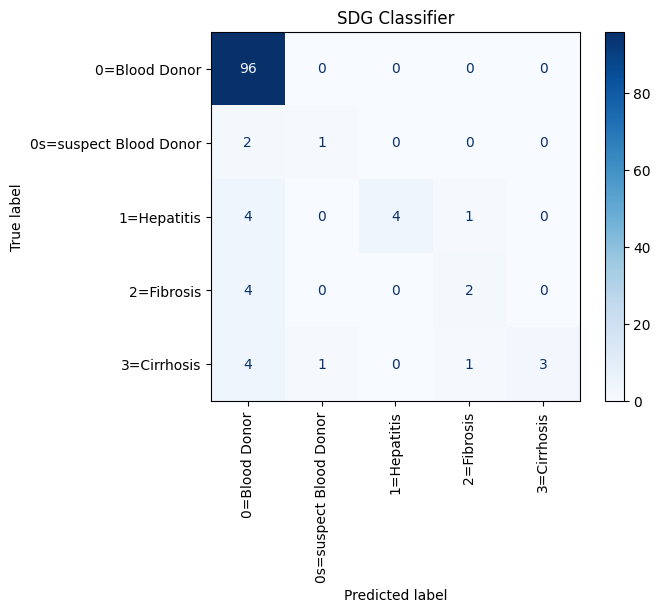

In [80]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, grid_sdg_predictions)
print("Accuracy:", accuracy)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, grid_sdg_predictions)
#print("Confusion Matrix:\n", conf_matrix)
print("\nConfusion Matrix:\n")
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=grid_sgd.best_estimator_.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation=90)
plt.title("SDG Classifier")
plt.show()

### E. Support Vector Machine (SVM) GridSearchCV

In [81]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [82]:
grid_svm = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [83]:
grid_svm.fit(X_train_processed,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.889 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.889 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.888 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.888 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.888 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.889 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.889 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.888 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.888 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.888 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.889 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

C:\Users\adnan\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


[CV 3/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.888 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.888 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.888 total time=   0.0s
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.889 total time=   0.0s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.889 total time=   0.0s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.888 total time=   0.0s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.888 total time=   0.0s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.888 total time=   0.0s
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.919 total time=   0.0s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.939 total time=   0.0s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.908 total time=   0.0s
[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.929 total time=   0.0s
[CV 5/5] END ........C=1, ga

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [84]:
grid_svm.best_params_ 

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [85]:
grid_svm.best_estimator_ 

SVC(C=10, gamma=0.01)

In [86]:
grid_svm_predictions = grid_svm.predict(X_test_processed)

Accuracy: 0.8699186991869918

Confusion Matrix:



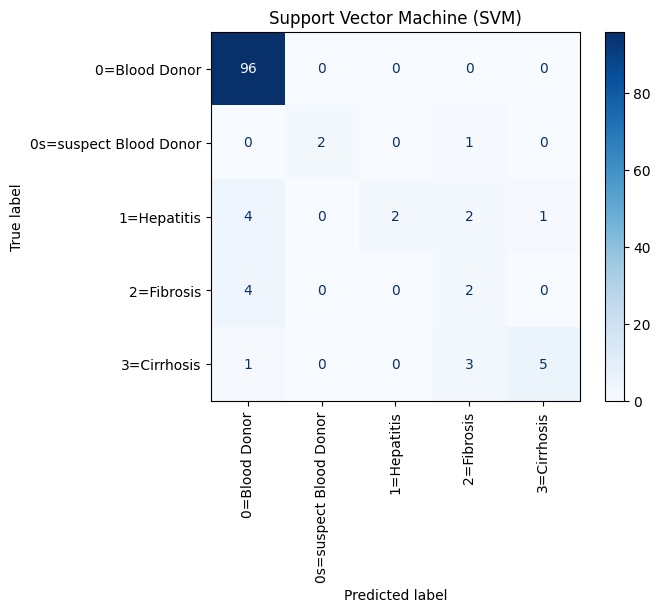

In [87]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, grid_svm_predictions)
print("Accuracy:", accuracy)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, grid_svm_predictions)
#print("Confusion Matrix:\n", conf_matrix)
print("\nConfusion Matrix:\n")
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=grid_svm.best_estimator_.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation=90)
plt.title("Support Vector Machine (SVM)")
plt.show()